# Running basic phi calculation from pyphi

In [1]:
import networkx as nx
from networkx.drawing.nx_pydot import pydot_layout
import pandas as pd

import pyphi.data_models as dm  # Prototype code
from pyphi.zap_tc import Zaptc
from pyphi.convert import sbs2sbn, sbn2sbs      

In [2]:
>>> import pyphi
>>> import numpy as np
>>> tpm = np.array([
...     [0, 0, 0],
...     [0, 0, 1],
...     [1, 0, 1],
...     [1, 0, 0],
...     [1, 1, 0],
...     [1, 1, 1],
...     [1, 1, 1],
...     [1, 1, 0]
... ])
>>> cm = np.array([
...     [0, 0, 1],
...     [1, 0, 1],
...     [1, 1, 0]
... ])
>>> labels = ('A', 'B', 'C')
>>> network = pyphi.Network(tpm, cm=cm, node_labels=labels)
>>> state = (1, 0, 0)
# state = (0, 1, 0)  # ERROR
>>> node_indices = (0, 1, 2)
>>> subsystem = pyphi.Subsystem(network, state, node_indices)

>>> pyphi.compute.phi(subsystem) # => 2.3125

2.3125

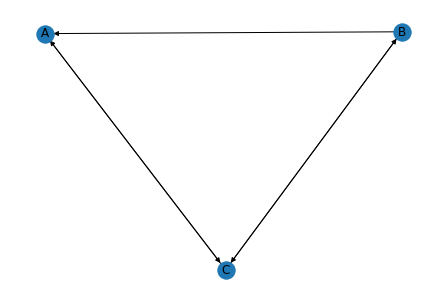

In [3]:
g=nx.from_numpy_array(cm,create_using=nx.DiGraph)
gn = dm.Gnet(g, tpm).draw()

In [4]:
gn.tpm

,A,B,C
000,0,0,0
001,0,0,1
010,1,0,1
011,1,0,0
100,1,1,0
101,1,1,1
110,1,1,1
111,1,1,0


In [5]:
gn.tpm.to_numpy()

array([[0, 0, 0],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0]])

Computing concepts:   0%|                                | 0/7 [00:00<?, ?it/s]

Using state=(1, 0, 0)


2.3125

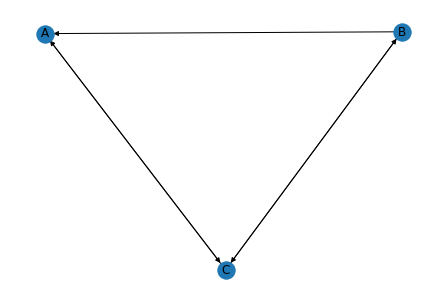

In [6]:
g=nx.from_numpy_array(cm,create_using=nx.DiGraph)
gn = dm.Gnet(g, tpm).draw()
gn.phi(state=(1,0,0))

Zap node: A state: 1.111
Zap node: B state: .....
Zap node: C state: 1111.
Zap node: D state: 1.1.1
Zap node: E state: 11.11


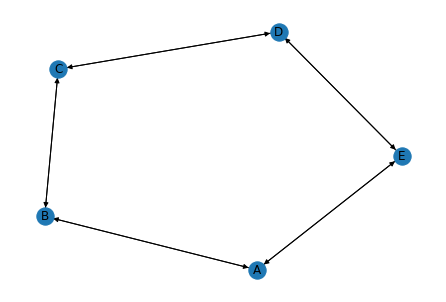

In [7]:
p = 5  # must be prime for Expander (7 is painfully slow)
g = nx.DiGraph(nx.chordal_cycle_graph(p)) # an Expander graph
gn = dm.Gnet(g).draw()  # RANDOM tpm
gn.discover_tpm()
#print(gn.tpm)

In [8]:
%time gn.phi()

Computing concepts:   0%|                               | 0/31 [00:00<?, ?it/s]

Using state=[0, 0, 0, 0, 0]


CPU times: user 354 ms, sys: 79.3 ms, total: 433 ms
Wall time: 8.73 s


0.037538

Zap node: A state: .111.
Zap node: B state: ..1..
Zap node: C state: .11..
Zap node: D state: .111.
Zap node: E state: 1..1.


Computing concepts:   0%|                               | 0/31 [00:00<?, ?it/s]

Using state=[0, 0, 0, 0, 0]


CPU times: user 49 ms, sys: 56.4 ms, total: 105 ms
Wall time: 196 ms


0.000702

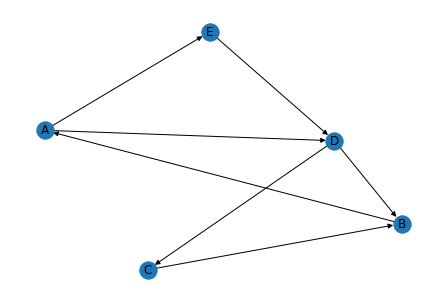

In [10]:
g = nx.gnp_random_graph(5, 0.4, directed=True) # num_nodes, prob_edge
gn = dm.Gnet(g).draw()  
gn.discover_tpm()
%time gn.phi()

Zap node: A state: .....
Zap node: B state: 11.1.
Zap node: C state: 1....
Zap node: D state: .111.
Zap node: E state: .1.1.


Computing concepts:   0%|                               | 0/31 [00:00<?, ?it/s]

Using state=[0, 0, 0, 0, 0]


CPU times: user 233 ms, sys: 66.7 ms, total: 300 ms
Wall time: 2.91 s


0.028379

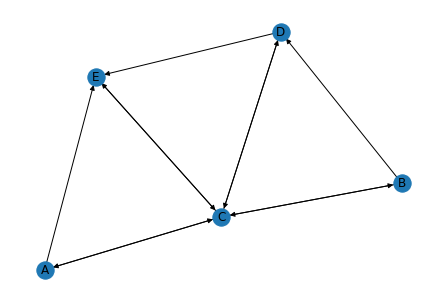

In [12]:
g = nx.gnp_random_graph(5, 0.4, directed=True) # num_nodes, prob_edge
gn = dm.Gnet(g).draw()  
gn.discover_tpm()
%time gn.phi()

In [13]:
gn.graph

In [17]:
nx.write_gml(gn.graph,'random_5_40.gml')

In [19]:
print(nx.info(gn.graph))

Name: 
Type: DiGraph
Number of nodes: 5
Number of edges: 11
Average in degree:   2.2000
Average out degree:   2.2000


In [22]:
gn.tpm.index

Index(['00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111',
       '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111',
       '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111',
       '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111'],
      dtype='object')